In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
df = pd.read_csv("House Price Prediction Dataset.csv")
df.head(2)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [27]:
X = df.drop("Price",axis=1)
y = df["Price"]

print(f"\nTarget Variable Statistics:")
print(y.describe())


Target Variable Statistics:
count      2000.000000
mean     537676.855000
std      276428.845719
min       50005.000000
25%      300098.000000
50%      539254.000000
75%      780086.000000
max      999656.000000
Name: Price, dtype: float64


In [28]:
df.head(1)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919


In [29]:
numerical_data = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test = train_test_split(numerical_data,y, test_size=0.2, random_state=42)
Scaler_X= StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

Scaler_y  = StandardScaler()
y_train = Scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = Scaler_y.transform(y_test.values.reshape(-1, 1))

In [30]:
print(f"Training Set Size: {X_train.shape[0]}")


Training Set Size: 1600


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred_lr = linear_model.predict(X_train)
y_test_pred_lr = linear_model.predict(X_test)


In [32]:
linear_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
linear_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
linear_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
linear_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
linear_train_r2 = r2_score(y_train, y_train_pred_lr)
linear_test_r2 = r2_score(y_test, y_test_pred_lr)

Visualization complete!


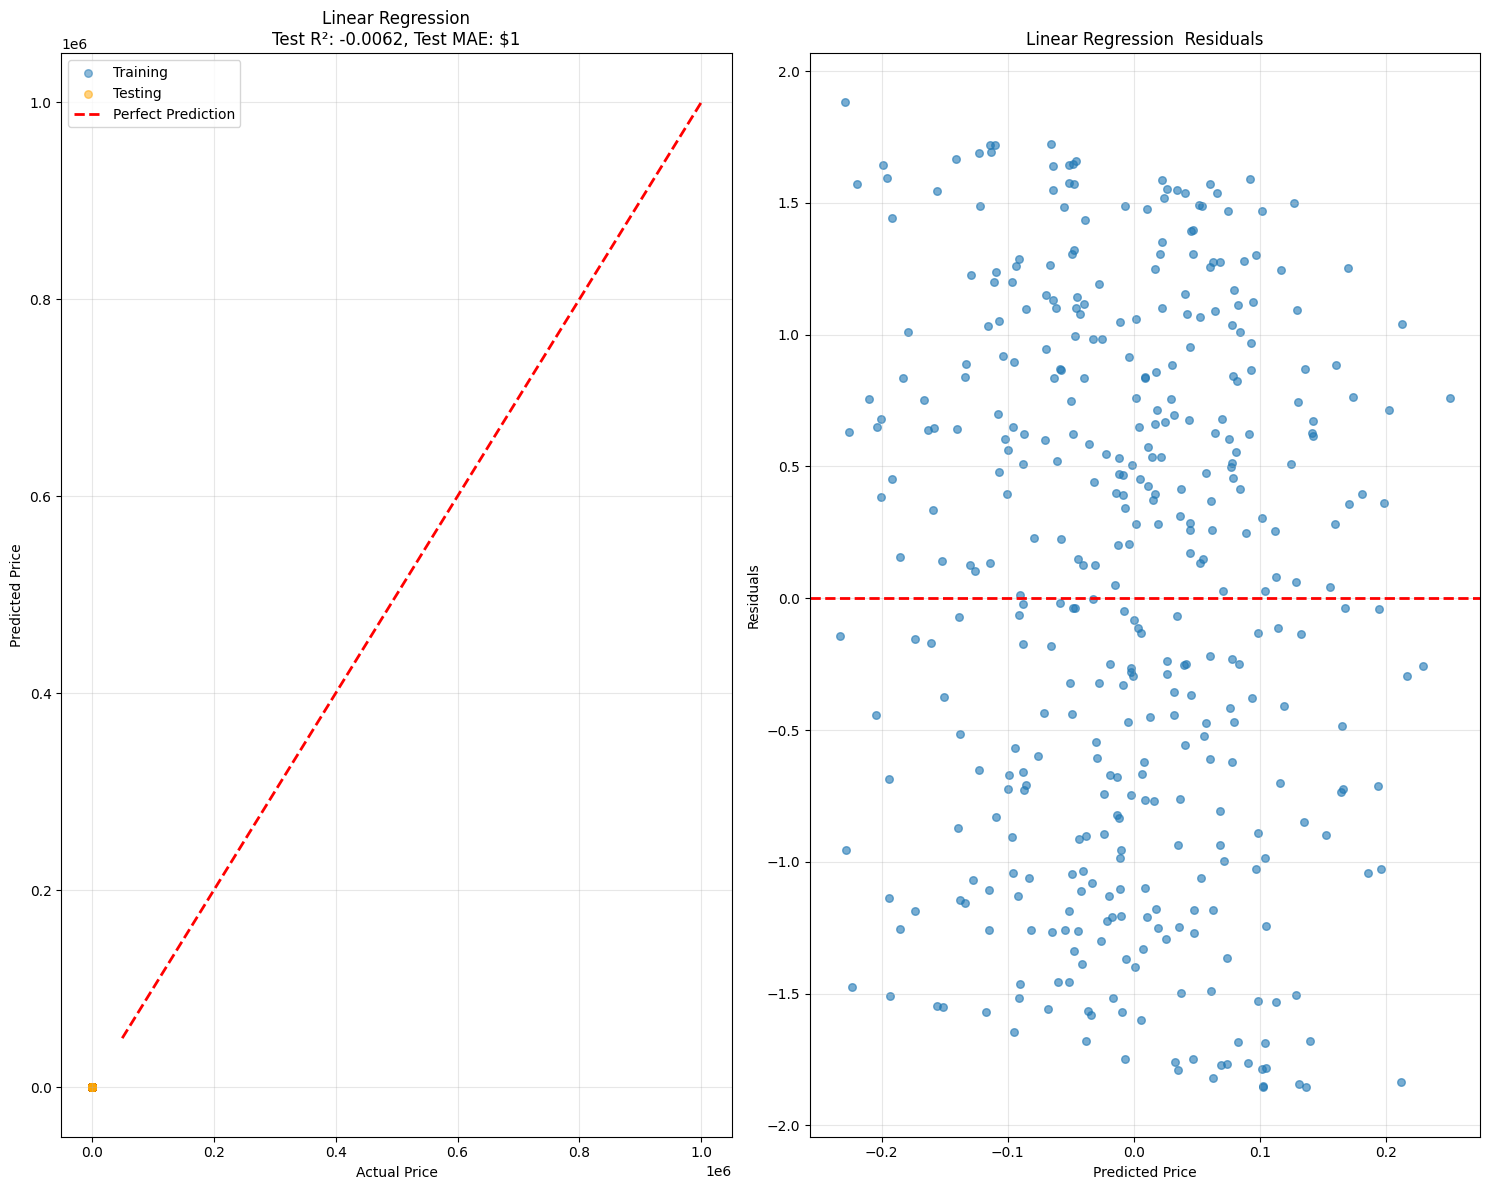

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 12))

axes[0].scatter(y_train, y_train_pred_lr, alpha=0.5, label='Training', s=30)
axes[0].scatter(y_test, y_test_pred_lr, alpha=0.5, label='Testing', s=30, color='orange')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Linear Regression\nTest R²: {linear_test_r2:.4f}, Test MAE: ${linear_test_mae:,.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

residuals_lr = y_test - y_test_pred_lr
axes[1].scatter(y_test_pred_lr, residuals_lr, alpha=0.6, s=30)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Linear Regression  Residuals')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

print("Visualization complete!")